In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("ENB2012_data.csv")
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Hight,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
data.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Hight                0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [6]:
data.shape

(768, 10)

In [9]:
X = data.drop(columns=["Heating Load", "Cooling Load"])
y = data[["Heating Load","Cooling Load"]]


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:

rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)

print("MSE:", mse)
print("R2:", r2)
rf_mse = mse
rf_r2=r2


MSE: 1.9173968933116854
R2: 0.9794492289627676


In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, lr_y_pred)
r2 = r2_score(y_test, lr_y_pred)

print("MSE:", mse)
print("R2:", r2)
lr_mse = mse
lr_r2 =r2

MSE: 9.523307751573418
R2: 0.9027048110077098


In [14]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor( random_state = 42 , max_depth = 10)
dt_model.fit(X_train,y_train)
dt_y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, dt_y_pred)
r2 = r2_score(y_test, dt_y_pred)

print("MSE:", mse)
print("R2:", r2)
dt_mse = mse
dt_r2 =r2

MSE: 2.819322779213416
R2: 0.969774827906376


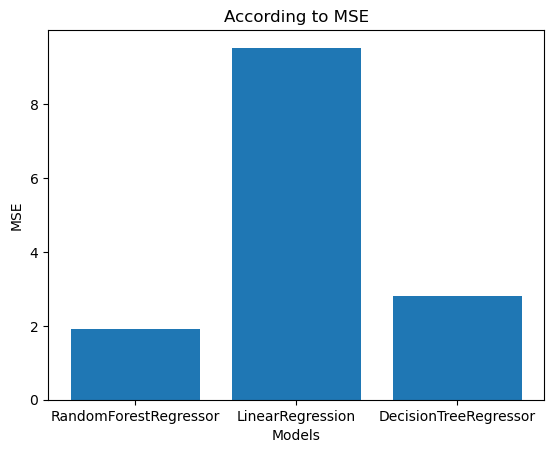

In [15]:
models = ['RandomForestRegressor','LinearRegression','DecisionTreeRegressor']
mses = [rf_mse,lr_mse,dt_mse]
r2s=[rf_r2,lr_r2,dt_r2]
plt.bar(models,mses)
plt.title("According to MSE")
plt.xlabel("Models")
plt.ylabel("MSE")
plt.show()

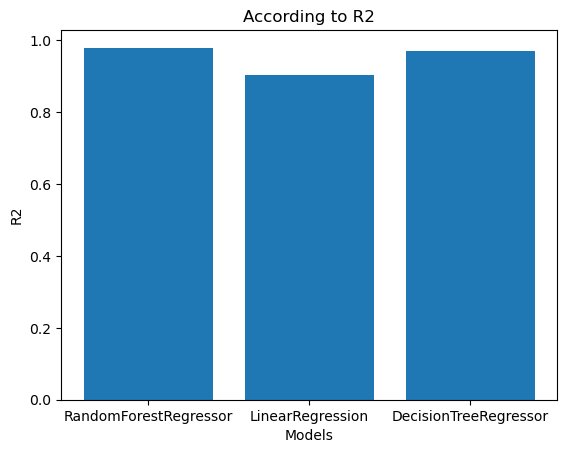

In [16]:
plt.bar(models,r2s)
plt.title("According to R2")
plt.xlabel("Models")
plt.ylabel("R2")
plt.show()

In [17]:
best_model= RandomForestRegressor()
best_model.fit(X_train,y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [18]:
best_y_pred = best_model.predict(X_test)
best_y_pred


array([[15.7249, 17.0724],
       [13.1339, 16.149 ],
       [32.5545, 33.3404],
       [42.0044, 41.9727],
       [16.732 , 20.0805],
       [23.1428, 28.0836],
       [24.3223, 26.052 ],
       [28.5352, 29.6366],
       [19.3068, 22.4646],
       [28.9827, 32.3532],
       [18.7684, 21.8283],
       [32.7364, 34.0894],
       [28.9019, 32.0774],
       [10.3508, 13.5914],
       [18.3813, 20.636 ],
       [36.721 , 37.0857],
       [36.0802, 35.96  ],
       [12.1319, 14.916 ],
       [14.5552, 16.5589],
       [33.082 , 34.1298],
       [29.0614, 29.9395],
       [41.8217, 42.8447],
       [11.5608, 14.0697],
       [35.9232, 41.3591],
       [15.1773, 19.2536],
       [36.0808, 38.6654],
       [36.5966, 37.604 ],
       [28.606 , 31.5039],
       [17.3376, 21.0447],
       [14.1909, 15.0191],
       [10.3421, 13.5511],
       [12.3505, 15.1004],
       [16.7425, 20.2747],
       [26.8563, 28.1331],
       [36.2248, 39.5295],
       [28.3443, 29.9705],
       [32.4652, 33.9012],
 

In [19]:
import joblib
joblib.dump(best_model,"best_model.pkl")

['best_model.pkl']

In [20]:
data.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Hight', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

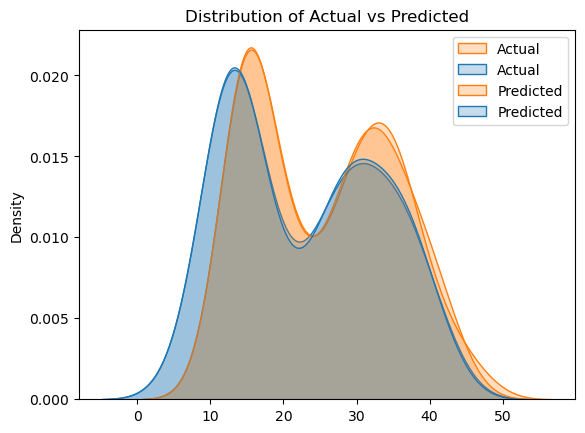

In [21]:
import seaborn as sns

sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(best_y_pred, label='Predicted', fill=True)
plt.title('Distribution of Actual vs Predicted')
plt.legend()
plt.show()

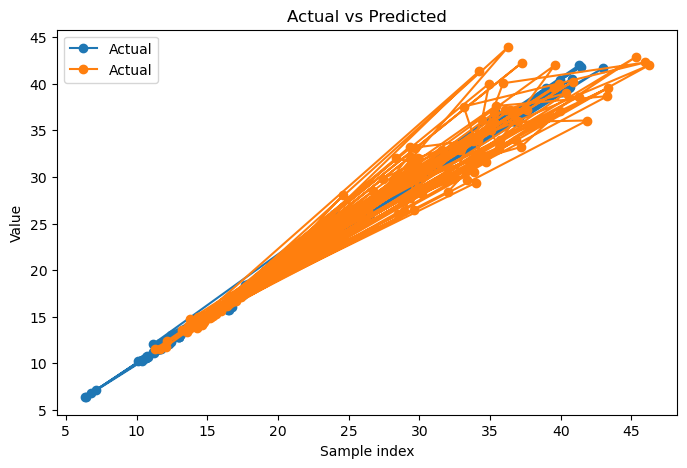

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(y_test,best_y_pred,label='Actual', marker='o')
#plt.plot(best_y_pred, label='Predicted', marker='x')
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


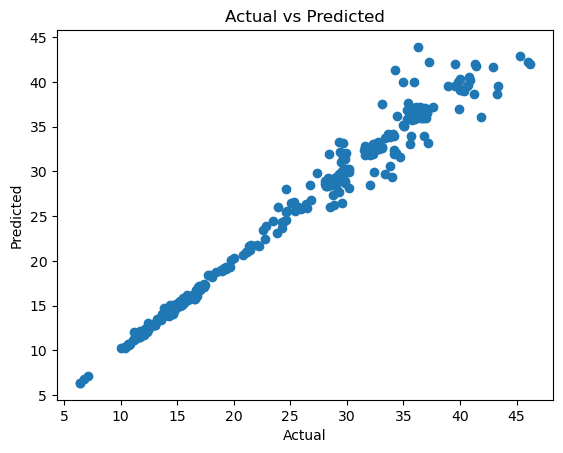

In [25]:
plt.scatter(y_test, best_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
